In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
sample = 20000
mean, sigma = 4, 5
X = np.random.normal(mean, sigma, sample)
X

array([5.10644619, 6.60323328, 2.55474382, ..., 8.74236226, 7.37856063,
       5.02473533])

In [15]:
a, b = 0.5, 4
nz_mean, nz_sig_1, nz_sig_2 = 0, 1, 5
Nz1 = np.random.normal(nz_mean, nz_sig_1, sample)
Nz2 = np.random.normal(nz_mean, nz_sig_2, sample)
Nz1, Nz2

(array([-0.68991617, -0.17147309,  0.26788158, ...,  0.48087322,
         0.90322327, -0.44224919]),
 array([ 0.41777964,  6.61696722,  2.20453057, ...,  2.21301243,
        -1.57396913, -3.01879799]))

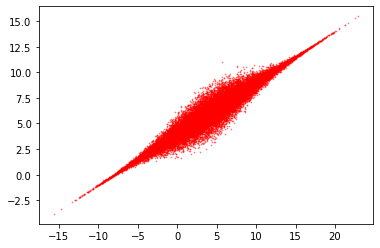

In [16]:
Y1 = a*X + b + Nz1 * np.exp(-(X - 4) ** 2 / 50)
plt.scatter(X, Y1, alpha = 0.5, c = 'red', s = 0.4)
plt.show()

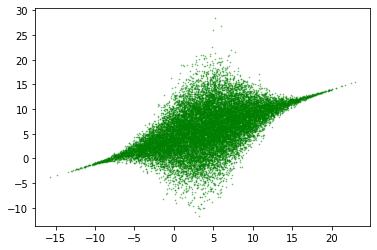

In [17]:
Y2 = a*X + b + Nz2 * np.exp(-(X-4)**2/50)
plt.scatter(X, Y2, alpha = 0.5, c = 'green', s = 0.4)
plt.show()

In [18]:
# Finding Correlation
y1corcoef = np.corrcoef(X, Y1)[0, 1]
y2corcoef = np.corrcoef(X, Y2)[0, 1]
y1cov = np.cov(X, Y1)[0, 1]
y2cov = np.cov(X, Y2)[0, 1]

In [19]:
f'y1 cor: {y1corcoef}, cov: {y1cov}'

'y1 cor: 0.9567465200340011, cov: 12.537543068504444'

In [20]:
f'y2 cor: {y2corcoef}, cov: {y2cov}'

'y2 cor: 0.5475430593214646, cov: 12.560449994071979'

In [9]:
li1 = (Nz1 * np.exp(-(X-4**2/50)))**2
sum = 0
for i in li1:
    sum += i
f'MSE eq1: {sum/sample}'

'MSE eq1: 253670821706.8256'

In [10]:
li2 = (Nz2 * np.exp(-(X-4)**2/50))**2
sum = 0
for i in li2:
    sum += i

f'MSE eq2 {sum/sample}'

'MSE eq2 14.690431873053273'